In [42]:
import numpy as np
import pandas as pd

In [43]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [44]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [45]:
df.shape

(5572, 5)

In [46]:
# 1.Data Cleaning
# 2.EDA - exploratory data analysis
# 3.Text preprocessing
# 4.Model building
# 5.Evaluation
# 6.Improvement

# Data Cleaning 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [48]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [49]:
df.shape

(5572, 2)

In [50]:
df.rename(columns = {'v1':'target', 'v2':'text'},inplace=True)
df.sample(5)

,target,text
2832,spam,You've won tkts to the EURO2004 CUP FINAL or å...
2736,ham,Really? I crashed out cuddled on my sofa.
2169,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å..."
4204,spam,IMPORTANT INFORMATION 4 ORANGE USER 0796XXXXXX...
3651,ham,"Probably not, still going over some stuff here"


In [51]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [52]:
df['target']=encoder.fit_transform(df['target'])

In [53]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [55]:
df.duplicated().sum()

403

In [56]:
# removing duplicates
df = df.drop_duplicates(keep='first')

In [57]:
df.duplicated().sum()

0

In [58]:
df.shape

(5169, 2)

# EDA

In [59]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

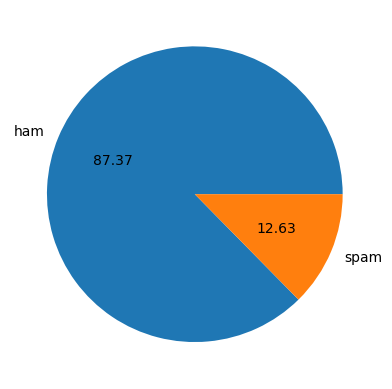

In [60]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [61]:
import nltk

In [62]:
nltk.download

[nltk_data] Downloading package punkt to /Users/abhay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
df['num_characters']=df['text'].apply(len)

In [64]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [65]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [66]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [67]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [68]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [69]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [70]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [71]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [72]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

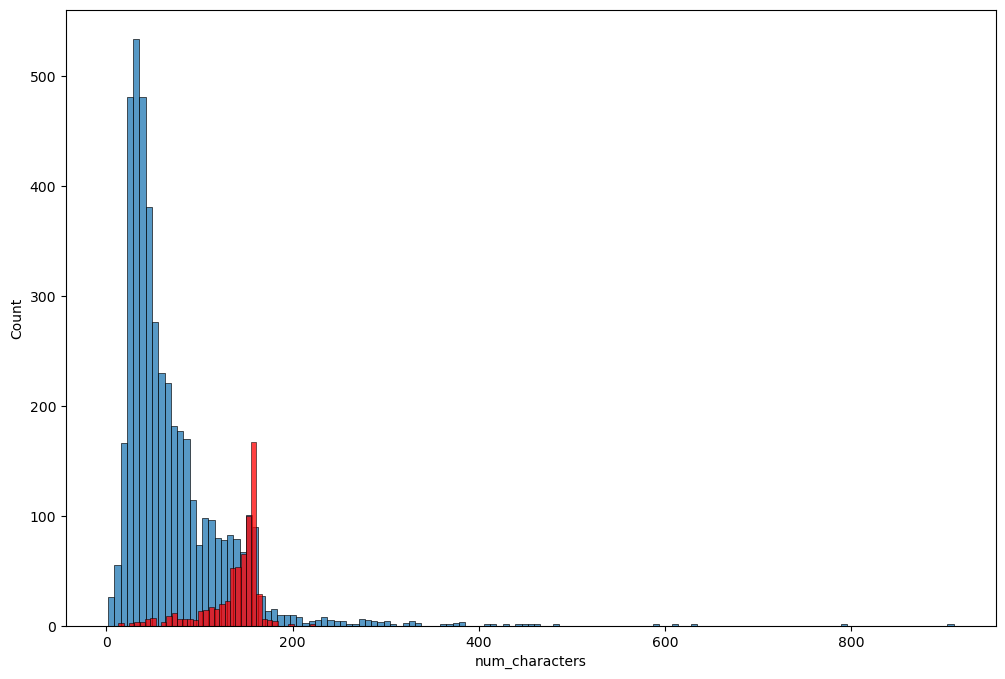

In [73]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

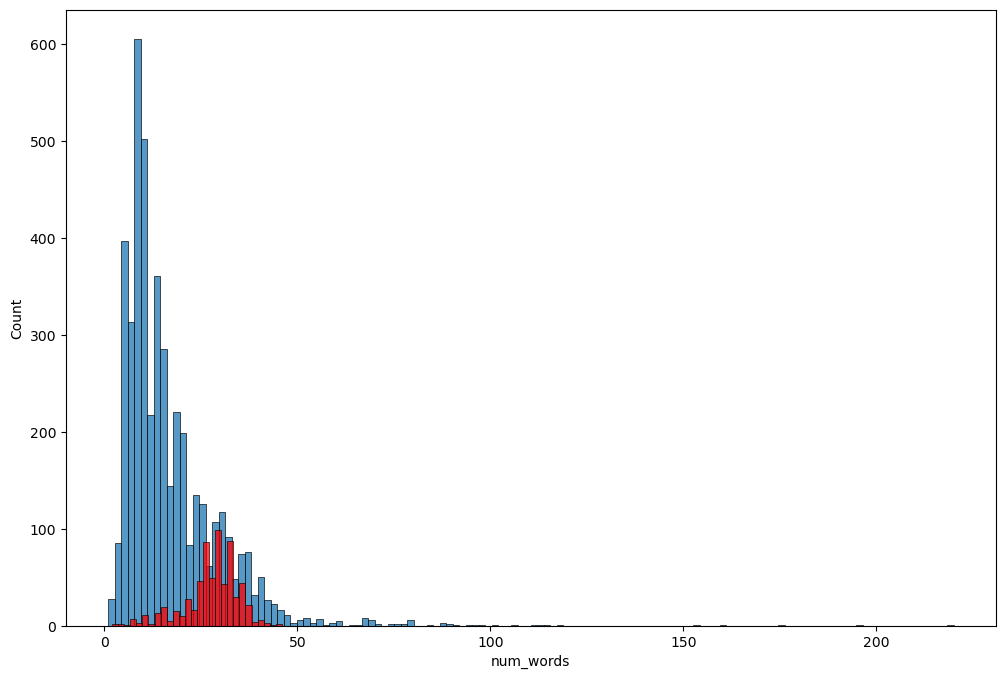

In [74]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

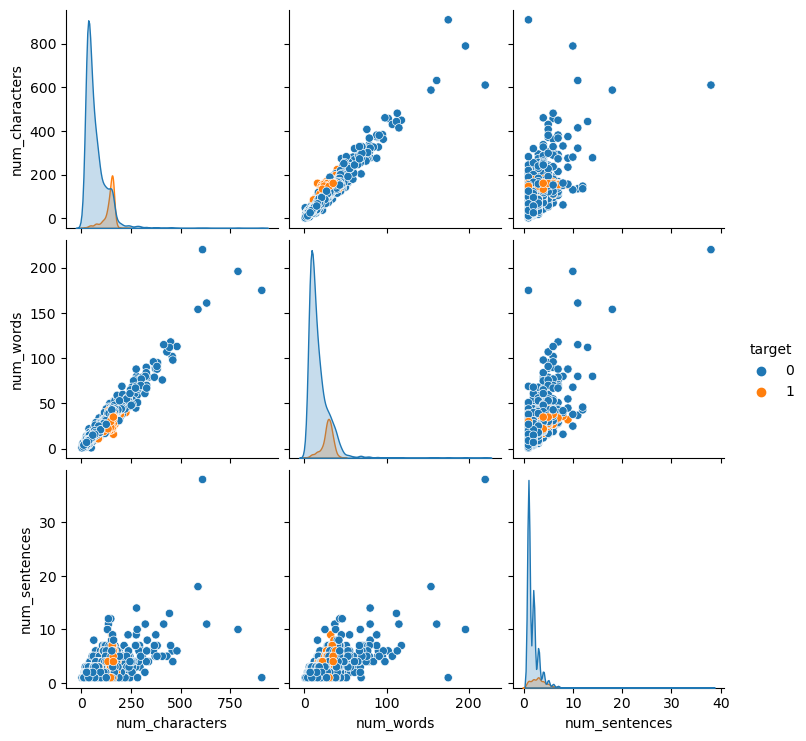

In [75]:
sns.pairplot(df,hue='target')

/var/folders/9c/9953fjg17wg16yhcgrwrfxtw0000gn/T/ipykernel_2636/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

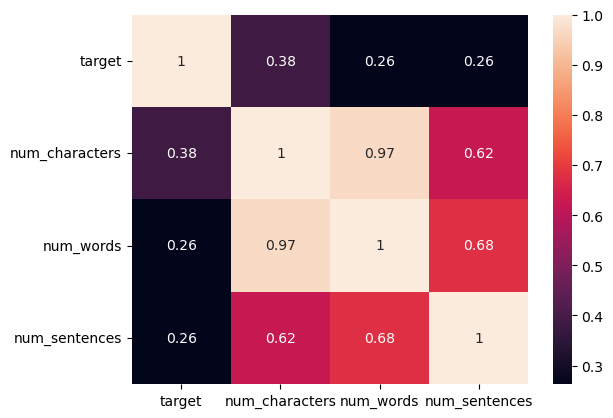

In [76]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [77]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [78]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/abhay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [82]:
transform_text('Hi, how Are you dancing Akshay? and which is your dance??')

'hi danc akshay danc'

In [81]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Dancing')

'danc'

In [83]:
df['transformed_text']=df['text'].apply(transform_text)

In [84]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
pip install wordcloud

In [85]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500, min_font_size=10,background_color='white')

In [86]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

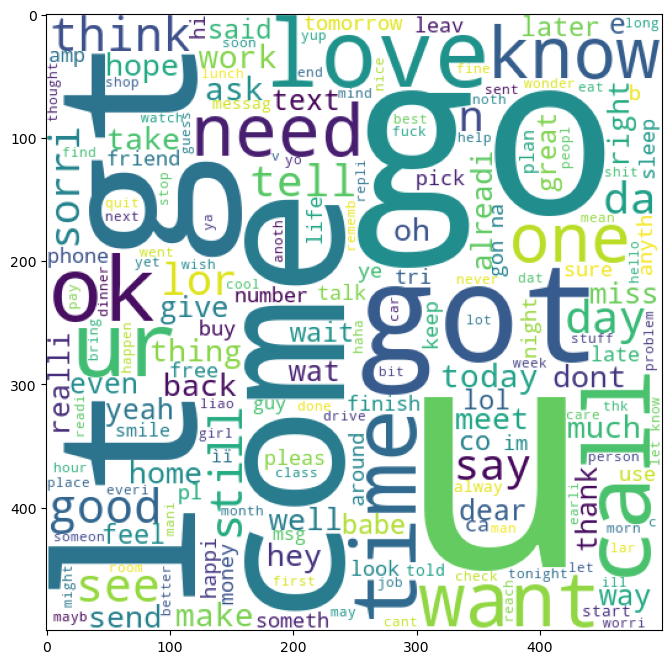

In [170]:
plt.figure(figsize=(12, 8))
plt.imshow(spam_wc)

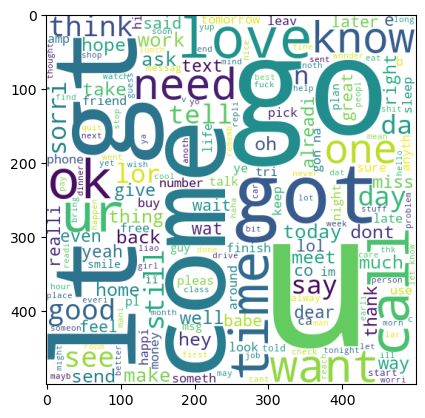

In [88]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [89]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [90]:
len(spam_corpus)

9939

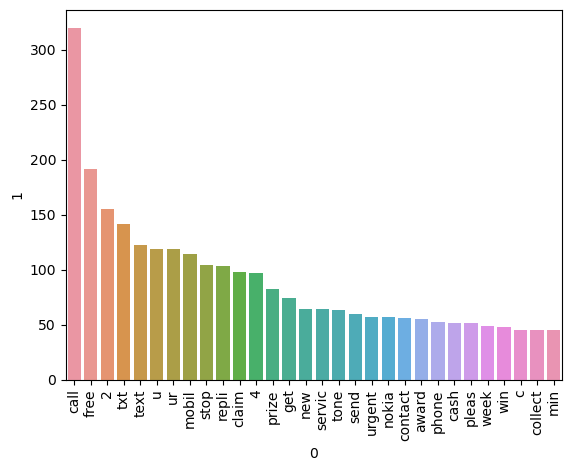

In [91]:
from collections import Counter
a=pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=a[0],y=a[1])
plt.xticks(rotation='vertical')
plt.show()

In [92]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

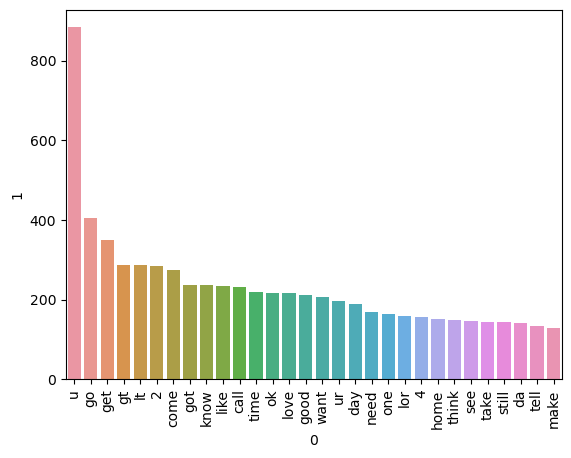

In [93]:
a=pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=a[0],y=a[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

# Vectorization of transformed text:
# 1) Bag of words: Frequent words column is made and each sms is checked for how many times are the frequent words
# appearing.
# Then give this input to naive bayes

# First using Bag of Words Vectorizer method:

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [96]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [98]:
X.shape

(5169, 6708)

In [99]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2) 

In [104]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [105]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Trying GNB model 1 and checking accuracy and precision

In [110]:
gnb.fit(X_train, Y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred1)}\n")
print(f"confusion : {confusion_matrix(Y_test, y_pred1)}\n")
print(f"precision: {precision_score(Y_test, y_pred1)}\n")

Accuracy: 0.8800773694390716

confusion : [[792 104]
 [ 20 118]]

precision: 0.5315315315315315



# Trying MNB model 1 and checking accuracy and precision

In [111]:
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred2)}\n")
print(f"confusion : {confusion_matrix(Y_test, y_pred2)}\n")
print(f"precision: {precision_score(Y_test, y_pred2)}\n")

Accuracy: 0.9642166344294004

confusion : [[871  25]
 [ 12 126]]

precision: 0.8344370860927153



# Trying BNB model 1 and checking accuracy and precision

In [112]:
bnb.fit(X_train, Y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred3)}\n")
print(f"confusion : {confusion_matrix(Y_test, y_pred3)}\n")
print(f"precision: {precision_score(Y_test, y_pred3)}\n")

Accuracy: 0.9700193423597679

confusion : [[893   3]
 [ 28 110]]

precision: 0.9734513274336283



# Now trying tfidf Vectorizer method of vectorization to check if results are better

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [124]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [125]:
Y = df['target'].values

In [126]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [127]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X, Y, test_size=0.2, random_state=2)

In [128]:
gnb1 = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

In [131]:
gnb1.fit(X_train_2, Y_train_2)
y_pred_2_1 = gnb1.predict(X_test_2)
print(f"1) Accuracy: {accuracy_score(Y_test_2, y_pred_2_1)}\n")
print(f"confusion : {confusion_matrix(Y_test_2, y_pred_2_1)}\n")
print(f"precision: {precision_score(Y_test_2, y_pred_2_1)}\n\n\n")


mnb1.fit(X_train_2, Y_train_2)
y_pred_2_2 = mnb1.predict(X_test_2)
print(f"2) Accuracy: {accuracy_score(Y_test_2, y_pred_2_2)}\n")
print(f"confusion : {confusion_matrix(Y_test_2, y_pred_2_2)}\n")
print(f"precision: {precision_score(Y_test_2, y_pred_2_2)}\n\n\n")

bnb1.fit(X_train_2, Y_train_2)
y_pred_2_3 = bnb1.predict(X_test_2)
print(f"3) Accuracy: {accuracy_score(Y_test_2, y_pred_2_3)}\n")
print(f"confusion : {confusion_matrix(Y_test_2, y_pred_2_3)}\n")
print(f"precision: {precision_score(Y_test_2, y_pred_2_3)}\n\n\n")


1) Accuracy: 0.8762088974854932

confusion : [[793 103]
 [ 25 113]]

precision: 0.5231481481481481



2) Accuracy: 0.9593810444874274

confusion : [[896   0]
 [ 42  96]]

precision: 1.0



3) Accuracy: 0.9700193423597679

confusion : [[893   3]
 [ 28 110]]

precision: 0.9734513274336283





# MNB1 of tfidf seems the best option out of -> bnb (bag of words ), mnb1 ( tfidf)

# Trying various macchine learnign algos to select the best option

In [135]:
# pip install xgboost

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [136]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [137]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [138]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

# best optimal result for max_features = 3000

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [164]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [165]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [166]:
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred2)}\n")
print(f"confusion : {confusion_matrix(Y_test, y_pred2)}\n")
print(f"precision: {precision_score(Y_test, y_pred2)}\n")

Accuracy: 0.9709864603481625

confusion : [[896   0]
 [ 30 108]]

precision: 1.0



In [144]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [145]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [146]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [147]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [148]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


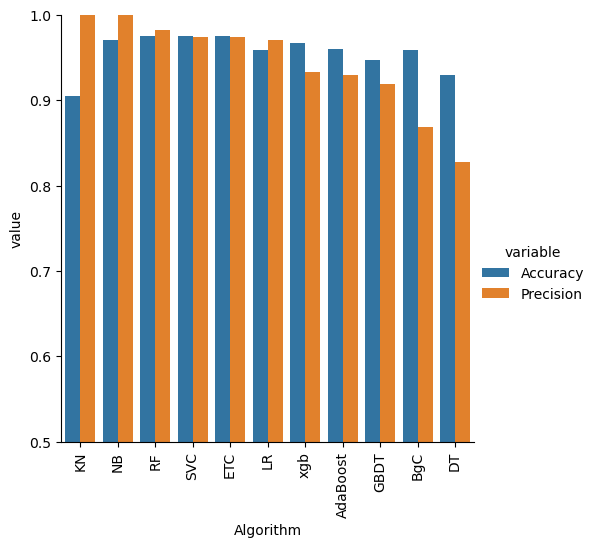

In [149]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# best option -> NB and ETC

In [150]:
# trying model improvement

In [162]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.933333,0.967118,0.933333
7,AdaBoost,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217


In [153]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

# also tried scaling but results were not improved instead the results worsened ..so we dont integrate scaling

# Now the best algos are
- NB : 0.970986 	1.000000
- ETC : 0.974855	0.974576 
- STC : 0.975822	0.974790

## using voting classifier which combines all 3 best algos to create final result to check with

In [154]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [155]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [156]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [157]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [158]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [159]:

from sklearn.ensemble import StackingClassifier

In [160]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [161]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [167]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))